# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep="\t")

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [7]:
# Solution 1
chipo.shape[0]

4622

In [8]:
# Solution 2
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


### Step 6. What is the number of columns in the dataset?

In [9]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [10]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [11]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [27]:
item = chipo['item_name']
count_list = []
for item_name in pd.unique(item):
    count_list.append(sum(item == item_name))
item[count_list.index(max(count_list))]

'Chicken Bowl'

<B> : Quantity를 고려하지 않고 단순히 order가 많이 된 item을 찾으려고 함

In [29]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


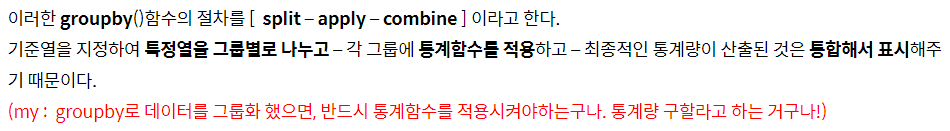

### Step 10. For the most-ordered item, how many items were ordered?

In [32]:
c.head(1).iloc[0,1]

761

### Step 11. What was the most ordered item in the choice_description column?

In [38]:
desc = chipo.groupby('choice_description').sum()
desc = desc.sort_values(['quantity'],ascending=False)
desc.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [46]:
desc.iloc[:,1].sum() # choice_description 의 경우만 고려했을때

3590

In [49]:
chipo['quantity'].sum()

4972

### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [54]:
type(chipo.item_price) # item_price 열의 type
chipo.item_price.dtype # item_price 열에 속해있는 Data의 type

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [55]:
floater = lambda x : float(x[1:-1])
chipo.item_price = chipo.item_price.apply(floater)

#### Step 13.c. Check the item price type

In [56]:
chipo.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [59]:
sum(chipo.quantity * chipo.item_price)

39237.020000000055

### Step 15. How many orders were made in the period?

In [68]:
chipo['order_id'].unique()[-1]

1834

### Step 16. What is the average revenue amount per order?

In [80]:
# Solution 1
chipo['total'] = chipo.quantity * chipo.item_price
chipo.groupby('order_id').sum().mean()['total']

21.394231188658654

### Step 17. How many different items are sold?

In [95]:
len(set(chipo.item_name)) # rough한 방법

50

In [99]:
chipo.item_name.value_counts().count()

50